<a href="https://colab.research.google.com/github/PanagiotisPetrid/ASTRO-BEAM-recruitment/blob/main/ML_assisted_spectral_line_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install necessary dependencies

In [19]:
#Run this code to install the necessary dependencies
!pip install numpy matplotlib tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

#1. Functions that generate multiple signals:
*   with spectral line
*   without spectral line



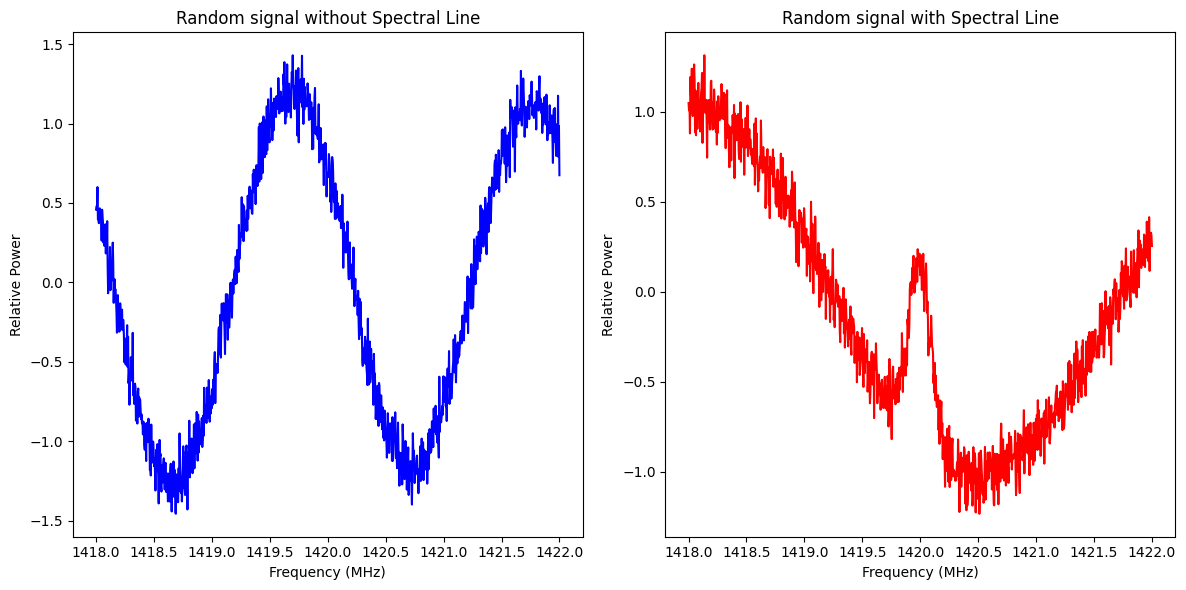

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Function to generate a signal without a spectral line
def create_signal_without_spectral_line():
    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    background_signal = (np.sin(2 * np.pi * random_factor1 * freq_range) +
                         random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Add Gaussian noise
    noise = np.random.normal(0, 0.1, len(background_signal))

    # Combine background signal and noise
    signal = background_signal + noise

    label = 0  # Label for no spectral line
    return signal, label

# Function to generate a signal with a spectral line
def create_signal_with_spectral_line():
    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    background_signal = (np.sin(2 * np.pi * random_factor1 * freq_range) +
                         random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Add the spectral line at 1420 MHz
    spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
    background_signal += spectral_line_shape

    # Add Gaussian noise
    noise = np.random.normal(0, 0.1, len(background_signal))

    # Combine background signal and noise
    signal = background_signal + noise

    label = 1  # Label for spectral line present
    return signal, label

# Generate example signals
signal_without_line, label_without_line = create_signal_without_spectral_line()
signal_with_line, label_with_line = create_signal_with_spectral_line()

# Plot the example signals
plt.figure(figsize=(12, 6))

# Subplot 1: Signal without a spectral line
plt.subplot(1, 2, 1)
plt.plot(freq_range, signal_without_line, color='blue')
plt.title('Random signal without Spectral Line')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')

# Subplot 2: Signal with a spectral line
plt.subplot(1, 2, 2)
plt.plot(freq_range, signal_with_line, color='red')
plt.title('Random signal with Spectral Line')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')

# Show the plots
plt.tight_layout()
plt.show()

#2. Generate training, testing and evaluation dataset

In [20]:
num_signals = 1000  # Number of signals OF EACH TYPE to generate
data = []
labels = []

for _ in range(num_signals):
    # Generate a signal without a spectral line
    signal, label = create_signal_without_spectral_line()
    data.append(signal)
    labels.append(label)

    # Generate a signal with a spectral line
    signal, label = create_signal_with_spectral_line()
    data.append(signal)
    labels.append(label)

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Generated {len(data)} signals.")

Generated 2000 signals.


#3. Split the Dataset into Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 1600
Testing set size: 400


#4. Train a Machine Learning Model

In [22]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.75%


#5. Test the Machine Learning Model

True Label: 1
Predicted Label: 1


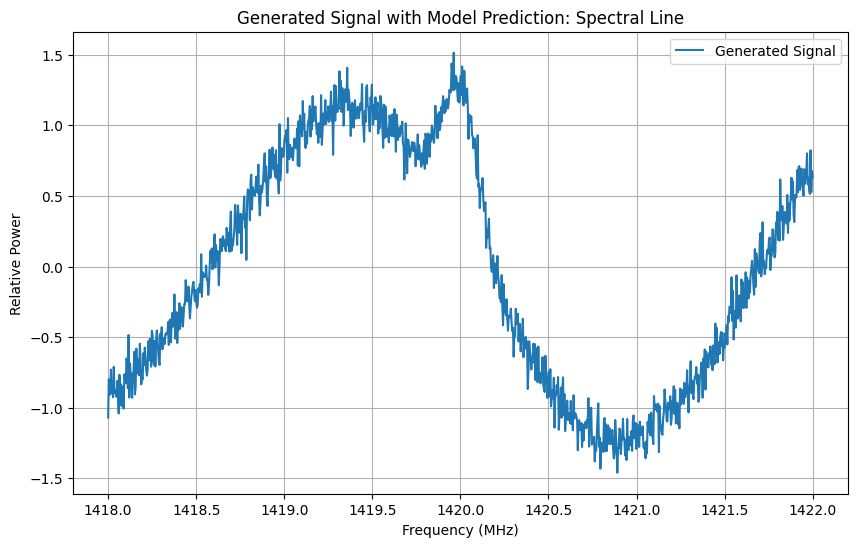

The model correctly classified the signal.
Predicted Probability: [[0.11 0.89]]


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the model is already trained and the functions for signal generation are defined

# Generate a new signal
new_signal, true_label = create_signal_with_spectral_line()  # Or use create_signal_without_spectral_line()

# Preprocess the signal (reshape if necessary)
new_signal = np.array(new_signal).reshape(1, -1)  # Reshape to (1, n_samples) if needed

# Feed the signal into the model for prediction
predicted_label = model.predict(new_signal)

# Display the result
print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label[0]}")

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(freq_range, new_signal[0], label='Generated Signal')
plt.title(f'Generated Signal with Model Prediction: {"Spectral Line" if predicted_label[0] == 1 else "No Spectral Line"}')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.legend()
plt.grid()
plt.show()

# Check if prediction is correct
if predicted_label[0] == true_label:
    print("The model correctly classified the signal.")
else:
    print("The model misclassified the signal.")

# Predict the probability (useful for models like RandomForest, Neural Networks, etc.)
predicted_probability = model.predict_proba(new_signal)
print(f"Predicted Probability: {predicted_probability}")